# Problem Set 3

See [Introduction](https://datascience.quantecon.org/../pandas/intro.html) and [Basic Functionality](https://datascience.quantecon.org/../pandas/basics.html)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Setup

These questions use data on daily Covid cases in health regions in Canada from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada).

In [2]:
url = "https://github.com/ccodwg/Covid19Canada/raw/master/timeseries_hr/cases_timeseries_hr.csv"
try : # only download if cases_raw has not already been defined 
    cases_raw
except:
    cases_raw = pd.read_csv(url, parse_dates=["date_report"])

try :
    hr_map 
except: 
    hr_map = pd.read_csv("https://github.com/ccodwg/Covid19Canada/raw/master/other/hr_map.csv")

/tmp/ipykernel_394/3391791791.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cases_raw = pd.read_csv(url, parse_dates=["date_report"])


Now, we create cases per 100,000 and then do the same manipulation as in the pandas basics lecture. We will focus on BC health regions in this problem set.

In [3]:
cases_raw

,province,health_region,date_report,cases,cumulative_cases
0,Alberta,Calgary,2020-01-25,0,0
1,Alberta,Calgary,2020-01-26,0,0
2,Alberta,Calgary,2020-01-27,0,0
3,Alberta,Calgary,2020-01-28,0,0
4,Alberta,Calgary,2020-01-29,0,0
...,...,...,...,...,...
84655,Yukon,Yukon,2022-04-29,9,4196
84656,Yukon,Yukon,2022-04-30,0,4196
84657,Yukon,Yukon,2022-01-05,0,4196
84658,Yukon,Yukon,2022-02-05,21,4217


In [4]:
cases_bc = cases_raw.loc[(cases_raw['province'] == 'BC') &  
                         (cases_raw['date_report'] < pd.to_datetime('2022-01-01')) &
                         (cases_raw['date_report'] >= pd.to_datetime('2021-01-01')),:] # Take the data for BC in year 2021 only
# create cases per 100,000
cases_bc = cases_bc.merge(hr_map[['province','health_region','pop']],
                          on=['province','health_region'],
                          how='left')
cases_bc['cases100k'] = cases_bc['cases'] / cases_bc['pop'] * 100_000
cases_bc = ( 
    cases_bc.reset_index()
    .pivot_table(index='date_report',columns='health_region', values='cases100k')
)    
cases_bc

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


The resulting `cases_bc` DataFrame contains Covid cases per 100,000 population for each BC health region and day, in 2021.

## Question 1

Transform the `cases` and `cases100k` columns by taking their absolute value. At each date, what is the minimum number of cases per 100,000 across health regions?

In [5]:
# Your code here
cases_raw['cases'] = cases_raw['cases'].abs()
cases_raw

,province,health_region,date_report,cases,cumulative_cases
0,Alberta,Calgary,2020-01-25,0,0
1,Alberta,Calgary,2020-01-26,0,0
2,Alberta,Calgary,2020-01-27,0,0
3,Alberta,Calgary,2020-01-28,0,0
4,Alberta,Calgary,2020-01-29,0,0
...,...,...,...,...,...
84655,Yukon,Yukon,2022-04-29,9,4196
84656,Yukon,Yukon,2022-04-30,0,4196
84657,Yukon,Yukon,2022-01-05,0,4196
84658,Yukon,Yukon,2022-02-05,21,4217


In [6]:
cases_bc = cases_raw.loc[(cases_raw['province'] == 'BC') &  
                         (cases_raw['date_report'] < pd.to_datetime('2022-01-01')) &
                         (cases_raw['date_report'] >= pd.to_datetime('2021-01-01')),:] # Take the data for BC in year 2021 only
# create cases per 100,000
cases_bc = cases_bc.merge(hr_map[['province','health_region','pop']],
                          on=['province','health_region'],
                          how='left')
cases_bc['cases100k'] = cases_bc['cases'] / cases_bc['pop'] * 100_000
cases_bc = ( 
    cases_bc.reset_index()
    .pivot_table(index='date_report',columns='health_region', values='cases100k')
)    
cases_bc

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [8]:
cases_bc.min(axis=1)

date_report
2021-01-01     0.000000
2021-01-02     9.101332
2021-01-03     9.935222
2021-01-04     6.500952
2021-01-05     0.000000
                ...    
2021-12-27    17.781177
2021-12-28    13.755250
2021-12-29    33.213897
2021-12-30    40.930258
2021-12-31    39.740889
Length: 365, dtype: float64

What was the (daily) median number of cases per 100,000 in each health region?

In [9]:
# Your code here
cases_bc.median()

health_region
Fraser               8.567287
Interior             6.582085
Island               2.482181
Northern             8.051854
Vancouver Coastal    5.576348
dtype: float64

What was the maximum number of cases per 100,000 across health regions? In what health region did it happen? On what date was this achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [10]:
# Your code here
cases_bc.max()

health_region
Fraser               121.886737
Interior             104.071454
Island                54.371594
Northern             136.210529
Vancouver Coastal     80.119006
dtype: float64

In [11]:
cases_bc['Northern'].idxmax()

Timestamp('2021-10-18 00:00:00')

Classify each health region as high or low volatility based on whether the variance of their cases per 100,000 is above or below 100.

In [12]:
# Your code here
def high_or_low_var(s):
    if s.var() < 100:
        out = "Low"
    else:
        out = "High"

    return out

cases_bc.agg(high_or_low_var)

health_region
Fraser               High
Interior             High
Island                Low
Northern             High
Vancouver Coastal    High
dtype: object

## Question 2

Imagine that we want to determine whether cases per 100,000 was High (> 10),
Low (0 < x <= 10), or None (x = 0) for each health region and each day.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is High, Low, or None.

In [13]:
# Your code here
def high_or_low_cases(x):
    if x > 10:
        return "High"
    if 0<x<=10:
        return "Low"
    if x == 0:
        return "None"

Pass your function to either `apply` or `applymap` and save the result in a new DataFrame called `case_bins`.

In [14]:
# Your code here
case_bins = cases_bc.applymap(high_or_low_cases)
case_bins

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,None,None,None,None,None
2021-01-02,High,High,Low,High,High
2021-01-03,High,Low,High,High,High
2021-01-04,High,Low,Low,High,High
2021-01-05,None,None,None,None,None
...,...,...,...,...,...
2021-12-27,High,High,High,High,High
2021-12-28,High,High,High,High,High
2021-12-29,High,High,High,High,High


## Question 3

This exercise has multiple parts:

Use another transformation on `case_bins` to count how many times each health region had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: `value_counts`

In [15]:
# Your code here
case_bins.apply(pd.Series.value_counts)

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
High,171,144,58,171,117
Low,84,108,195,78,138
None,110,113,112,116,110


Construct a horizontal bar chart (you can refer to an example of horizontal bar chart [here](https://www150.statcan.gc.ca/edu/power-pouvoir/c-g/c-g05-2-3-eng.png)) to detail the occurrences of each level.
Use one bar per health region and classification for 15 total bars.

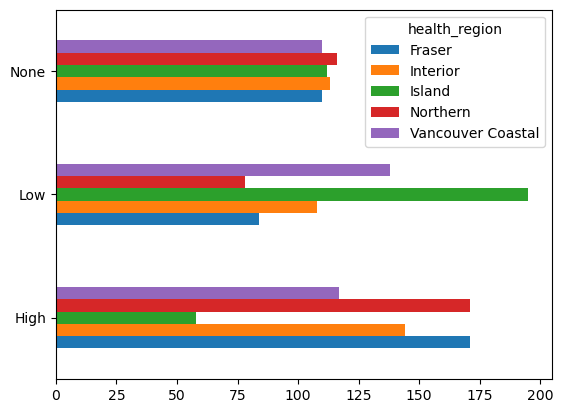

In [16]:
# Your code here
import matplotlib.pyplot as plt

case_bins_plot = case_bins.apply(pd.Series.value_counts).plot(kind='barh')

## Question 4

For a single health region of your choice, determine the mean
cases per 100,000 during “High” and “Low” case times.
(recall your `case_bins` DataFrame from the exercise above)

In [17]:
# Your code here
high_fraser = cases_bc[cases_bc['Fraser'] > 10]
high_fraser

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-09,12.929770,33.034614,8.155739,31.536428,9.020564
2021-01-10,28.224743,44.211739,14.302093,83.537985,15.252953
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [18]:
low_fraser = cases_bc[(cases_bc["Fraser"] <= 10) & (cases_bc["Fraser"] > 0)]
low_fraser

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-06,5.939285,2.359615,0.118199,0.670988,3.936246
2021-01-12,5.150884,9.686842,8.864934,21.136117,5.904369
2021-01-26,9.040327,6.582085,2.482181,11.742287,10.250640
2021-02-06,6.412325,4.098279,0.236398,1.341976,2.706169
2021-02-07,1.892162,3.104757,0.000000,0.670988,1.722108
...,...,...,...,...,...
2021-12-07,1.997282,5.215992,0.590996,0.000000,3.116195
2021-12-08,5.676485,33.655566,3.427774,4.361421,7.544471
2021-12-14,5.781605,18.007591,14.538492,11.406793,8.692543


In [19]:
high_fraser["Fraser"].mean()

25.834643784274338

In [20]:
low_fraser["Fraser"].mean()

4.829266712829401

Which health regions in our sample performs the best during “bad times" ? To
determine this, compute each health region’s mean daily cases per 100,000 where the daily cases per 100,000 is greater than 10 (i.e., in the "high"
category as defined above).

In [21]:
# Your code here
cases_bc_high = cases_bc > 10
cases_bc_high_count = cases_bc[cases_bc_high]
cases_bc_high_count

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,25.701861,24.589675,NaN,33.213897,24.191511
2021-01-03,45.464436,NaN,10.519722,39.252788,26.815675
2021-01-04,21.129137,NaN,NaN,17.110190,21.813363
2021-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [22]:
cases_bc_high_count.mean()

health_region
Fraser               25.834644
Interior             25.332230
Island               20.921244
Northern             31.457950
Vancouver Coastal    23.868397
dtype: float64

## Question 5-6

Consider a bond that pays a \$500 coupon once every quarter.

It pays in March, June, September, and December.

It promises to do so for 10 years after you purchase it, from January 2022 to December 2031.

You discount the future at the rate of $r = 0.005$ **per month**.

### Question 5

How much do you value the asset in January 2022?

In [9]:
# Your code goes here
r_annual = ((1+0.005)**12)-1
r_new = r_annual/4

def npv_func(y,r,n,t):
    npv = y*((1-(1+r)**(-n*t))/r)
    return npv

npv_func(500.0,r_new,4.0,10.0)

14844.021490247931

The asset is valued at $14844.02 in January 2022.

### Question 6

Consider a different asset that pays a lump sum at its expiration date rather than a quarterly coupon of \$500 dollars.

How much would this asset need to pay on December 2031 for the two assets to be equally valued?

In [13]:
# Your code goes here
def fut_value_func(pv,r,n):
    fv = pv*((1+r)**n)
    return fv

fut_value_func(14844.02,r_annual,10.0)

27007.161507910012

The asset would need to pay $27007.16 in December 2031.